netid: bj225

# INFO 1998 Final Project - Bitcoin Sentiment Analysis

## Table of Contents

- Data Cleaning Code

- Research Question

- Dataset Description

- Descriptive Analysis

- Model Selection

- Conclusion

## 0. Data Cleaning

In [2]:
# imports

import pandas as pd
import seaborn as sns
import sklearn
df = pd.read_csv("~/Desktop/INFO 1998/Bitcoin_tweets.csv")

/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/2648335222.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("~/Desktop/INFO 1998/Bitcoin_tweets.csv")


In [3]:
df = df.sort_values(by = 'date')
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075.0,361.0,False,2021-02-05,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,['crypto'],Twitter Web App,False
1135,Cain75,NaN,"Bitcoin, BTC, Crypto, Stockmarket, USD, Money",2021-01-03 07:43:35,4.0,6.0,35.0,False,2021-02-05,#Bitcoin #BTC #MMCrypto\n\n🚨URGENT EMERGENCY🚨 ...,"['Bitcoin', 'BTC', 'MMCrypto']",Twitter Web App,False
1134,Crypto Trader,NaN,Bot to stream crypto (mostly BTC) info and fla...,2017-09-09 04:26:15,1094.0,161.0,59.0,False,2021-02-05,"$BTC #BTC #Bitcoin: $37,508.17\n #tradealert \...","['BTC', 'Bitcoin', 'tradealert', 'fibonacci', ...",CryptoTradeBot2,False
1133,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097.0,6853.0,False,2021-02-05,#Bitcoin #BTC $MARA $RIOT #inflation $GBTC #Cr...,"['Bitcoin', 'BTC', 'inflation', 'Crypto']",Twitter for Android,False
1132,Macstones,"Ilorin, Nigeria",Music Promoter | Blogger | Chelsea | My likes ...,2016-11-15 01:45:48,16936.0,15851.0,6769.0,False,2021-02-05,“you look like all these btc boys”. \nWhat doe...,"['BTC', 'Bitcoin']",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492972,WANSIK KIM,NaN,NaN,2021-10-17 04:09:20,6.0,50.0,54.0,False,2021-10-27,@AirdropDet Very good project !!!\nI am happy ...,"['Airdrops', 'Yarloo', 'AirdropDetective', 'YA...",Twitter for Android,False
1492973,Blue Collar Bitcoin Podcast,NaN,Firefighters explore the most important moneta...,2021-05-18 00:53:56,906.0,262.0,1279.0,False,2021-10-27,"Next time a buddy asks u about #Bitcoin, just ...",['Bitcoin'],Twitter for Android,False
1492974,Mark 💙✌🏼😈,"Seattle, WA",•USN Veteran •RN •Crypto Investor •DeFi and NF...,2020-12-25 22:47:12,61.0,75.0,359.0,False,2021-10-27,$SHIB 🔥🚀\nFOMO is just amazing \n\n#BTC #BNB #...,"['BTC', 'BNB', 'ADA', 'ONE', 'ETH', 'SHIB', 'S...",Twitter for iPhone,False
1492976,PET BAGS,"California,USA",NaN,2021-02-15 15:15:42,30.0,240.0,0.0,False,2021-10-27,500 Dollars Everyday Playing Bitcoin Crash Gam...,"['crypto', 'crash', 'game', 'bitcoin', 'crashg...",Twitter Web App,False


In [4]:
df_clean = df.dropna(subset=['date', 'text'])
len(df_clean)

1500000

In [5]:
df = df_clean.iloc[1:1500001]

In [6]:
dates = []
try:
    for i in range(len(df)):  
        date = pd.to_datetime(df.iloc[i]['date']).date()
        dates.append(date)
    df['date'] = dates
except Exception as e:
    print(df.iloc[i]['date'])
    print(e)

/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/290758553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = dates


In [7]:
df.to_csv('~/Desktop/INFO 1998/bitcoin_tweets.csv', index = False)

## 1. Research Questions

The goal of this project is to analyze the sentiment (positive or negative) of Bitcoin tweets, and build a predictive model that predicts bitcoin price change using the analysis. This will be a regression analysis, and our features will be what's provided in the dataset, and the outcome will be the % change in bitcoin price.


## 2. Dataset Description




The [Bitcoin Tweets](https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets) dataset that I used for this project was downloaded from Kaggle. 

In [8]:
df = pd.read_csv("~/Desktop/INFO 1998/bitcoin_tweets.csv")

/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/3831905773.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("~/Desktop/INFO 1998/bitcoin_tweets.csv")


In [9]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Cain75,NaN,"Bitcoin, BTC, Crypto, Stockmarket, USD, Money",2021-01-03 07:43:35,4.0,6.0,35.0,False,2021-02-05,#Bitcoin #BTC #MMCrypto\n\n🚨URGENT EMERGENCY🚨 ...,"['Bitcoin', 'BTC', 'MMCrypto']",Twitter Web App,False
1,Crypto Trader,NaN,Bot to stream crypto (mostly BTC) info and fla...,2017-09-09 04:26:15,1094.0,161.0,59.0,False,2021-02-05,"$BTC #BTC #Bitcoin: $37,508.17\n #tradealert \...","['BTC', 'Bitcoin', 'tradealert', 'fibonacci', ...",CryptoTradeBot2,False
2,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097.0,6853.0,False,2021-02-05,#Bitcoin #BTC $MARA $RIOT #inflation $GBTC #Cr...,"['Bitcoin', 'BTC', 'inflation', 'Crypto']",Twitter for Android,False
3,Macstones,"Ilorin, Nigeria",Music Promoter | Blogger | Chelsea | My likes ...,2016-11-15 01:45:48,16936.0,15851.0,6769.0,False,2021-02-05,“you look like all these btc boys”. \nWhat doe...,"['BTC', 'Bitcoin']",Twitter for iPhone,False
4,😘CelebrityBoyFriend😘,Nigeria,🇨🇦\n\nPublic Figure👨‍💼||\n\n\nYeshua is King ✝...,2012-06-20 11:40:45,2177.0,1963.0,77236.0,False,2021-02-05,Don't be fooled guys #socialmedia is next.. th...,"['socialmedia', 'EndSARS', 'Bitcoin', 'BTC', '...",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499994,WANSIK KIM,NaN,NaN,2021-10-17 04:09:20,6.0,50.0,54.0,False,2021-10-27,@AirdropDet Very good project !!!\nI am happy ...,"['Airdrops', 'Yarloo', 'AirdropDetective', 'YA...",Twitter for Android,False
1499995,Blue Collar Bitcoin Podcast,NaN,Firefighters explore the most important moneta...,2021-05-18 00:53:56,906.0,262.0,1279.0,False,2021-10-27,"Next time a buddy asks u about #Bitcoin, just ...",['Bitcoin'],Twitter for Android,False
1499996,Mark 💙✌🏼😈,"Seattle, WA",•USN Veteran •RN •Crypto Investor •DeFi and NF...,2020-12-25 22:47:12,61.0,75.0,359.0,False,2021-10-27,$SHIB 🔥🚀\nFOMO is just amazing \n\n#BTC #BNB #...,"['BTC', 'BNB', 'ADA', 'ONE', 'ETH', 'SHIB', 'S...",Twitter for iPhone,False
1499997,PET BAGS,"California,USA",NaN,2021-02-15 15:15:42,30.0,240.0,0.0,False,2021-10-27,500 Dollars Everyday Playing Bitcoin Crash Gam...,"['crypto', 'crash', 'game', 'bitcoin', 'crashg...",Twitter Web App,False


In [10]:
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Cain75,NaN,"Bitcoin, BTC, Crypto, Stockmarket, USD, Money",2021-01-03 07:43:35,4.0,6.0,35.0,False,2021-02-05,#Bitcoin #BTC #MMCrypto\n\n🚨URGENT EMERGENCY🚨 ...,"['Bitcoin', 'BTC', 'MMCrypto']",Twitter Web App,False
1,Crypto Trader,NaN,Bot to stream crypto (mostly BTC) info and fla...,2017-09-09 04:26:15,1094.0,161.0,59.0,False,2021-02-05,"$BTC #BTC #Bitcoin: $37,508.17\n #tradealert \...","['BTC', 'Bitcoin', 'tradealert', 'fibonacci', ...",CryptoTradeBot2,False
2,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097.0,6853.0,False,2021-02-05,#Bitcoin #BTC $MARA $RIOT #inflation $GBTC #Cr...,"['Bitcoin', 'BTC', 'inflation', 'Crypto']",Twitter for Android,False
3,Macstones,"Ilorin, Nigeria",Music Promoter | Blogger | Chelsea | My likes ...,2016-11-15 01:45:48,16936.0,15851.0,6769.0,False,2021-02-05,“you look like all these btc boys”. \nWhat doe...,"['BTC', 'Bitcoin']",Twitter for iPhone,False
4,😘CelebrityBoyFriend😘,Nigeria,🇨🇦\n\nPublic Figure👨‍💼||\n\n\nYeshua is King ✝...,2012-06-20 11:40:45,2177.0,1963.0,77236.0,False,2021-02-05,Don't be fooled guys #socialmedia is next.. th...,"['socialmedia', 'EndSARS', 'Bitcoin', 'BTC', '...",Twitter for Android,False
5,Flamezy Omo Abana,"Lagos,Nigeria",🧊 •Alien Invasion Inc.👽.\n🧊 •Cancer™♋.\n🧊 •Add...,2014-09-26 10:01:42,304.0,343.0,1481.0,False,2021-02-05,Decided To Drop This Here!!!\nI Go Change Coun...,['Bitcoin'],Twitter for Android,False
6,₿ullrun Opinions - Litecoin / BTC/ DOT/ ETH/ UDOO,NaN,"Person with informed opinions about Litecoin, ...",2017-12-11 14:48:20,1553.0,1317.0,9895.0,False,2021-02-05,@daphantomman @Ilikedtolurk @novogratz I was t...,['BTC'],Twitter Web App,False
7,Tiffany Martinez 🌴,California,Helping raise awareness for #Endometriosis & #...,2009-07-26 00:25:01,179.0,46.0,843.0,False,2021-02-05,"""#Technology, #Educational and #RewardsProgram...","['Technology', 'Educational', 'RewardsProgram'...",Twitter for Android,False
8,𝘾𝙧𝙮𝙥𝙩𝙤+𝙎𝙥𝙤𝙧𝙩𝙨=𝘾𝙖𝙨𝙝 🏧₿,Lake Las Vegas / Frisco TX,Expert in #Crypto - Sports trading. Direct acc...,2014-03-07 12:20:09,4308.0,548.0,3811.0,False,2021-02-05,Would not be surprised to see a mini dump in #...,"['Bitcoin', 'BTC']",Twitter Web App,False
9,Mulon-Esk,All Streets,"See what I did there?\n\n2017 was preperation,...",2021-02-03 18:58:55,12.0,58.0,112.0,False,2021-02-05,Some of these low caps in my portfolio are goi...,NaN,Twitter for Android,False


The cleaned dataset has 1.5 million tweets with 13 columns. However, many of the columns (user_name, location or description) seem to be irrelevant in terms of predicting Bitcoin sentiment, which is our main goal.

In [11]:
df["date"]

0          2021-02-05
1          2021-02-05
2          2021-02-05
3          2021-02-05
4          2021-02-05
              ...    
1499994    2021-10-27
1499995    2021-10-27
1499996    2021-10-27
1499997    2021-10-27
1499998    2021-10-27
Name: date, Length: 1499999, dtype: object

The tweets collected date from February 10th of 2021 to April 17th of 2022.

## 3. Descriptive Analysis

First, we will "quantify" the sentiment of tweets using the [Textblob](https://textblob.readthedocs.io/en/dev/) library. Textblob will return polarity, which tells how positive or negative the sentence is, and subjectivity, which tells how much personal opinion is included in the text. We will add these two new columns to the dataframe using the textblob API.

In [12]:
from textblob import TextBlob
import time

Because our complete dataset is too big and will take a lot of time to process, we will do the introductory analysis using a test run with 100,000 tweets.

In [13]:
df_test = df[::15]

In [14]:
start_time = time.time()
polarity = []
for i in range(len(df_test)):   
    polarity.append(TextBlob(df_test.iloc[i]['text']).sentiment.polarity)
print("time: ",time.time() - start_time, "sec")

time:  49.53327012062073 sec


In [15]:
df_test['polarity'] = polarity

/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/734156744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['polarity'] = polarity


In [16]:
subjectivity = []
for i in range(len(df_test)):   
    subjectivity.append(TextBlob(df_test.iloc[i]['text']).sentiment.subjectivity)

In [17]:
df_test['subjectivity'] = subjectivity

/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/745656110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['subjectivity'] = subjectivity


In [18]:
df_test_nonzero = df_test[df_test['polarity'] != 0.00]

In [19]:
len(df_test_nonzero)

62313

<AxesSubplot:xlabel='polarity', ylabel='Count'>

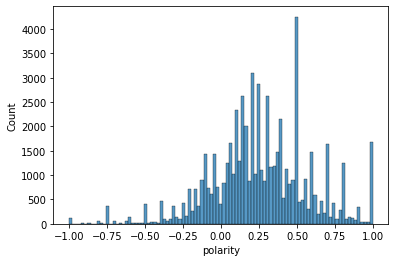

In [20]:
sns.histplot(x = df_test_nonzero['polarity'], data = df_test_nonzero)

<AxesSubplot:xlabel='subjectivity', ylabel='Count'>

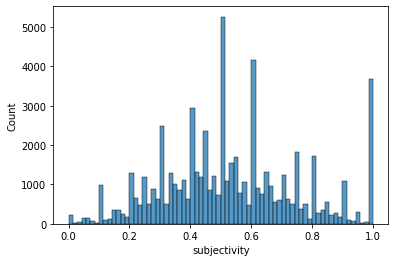

In [21]:
sns.histplot(x = df_test_nonzero['subjectivity'], data = df_test_nonzero)

In [22]:
df_test_nonzero.describe()

,user_followers,user_friends,user_favourites,polarity,subjectivity
count,6.231300e+04,6.231300e+04,62313.000000,62313.000000,62313.000000
mean,8.782940e+03,1.301924e+03,6662.224335,0.261391,0.531722
std,1.055600e+05,1.771697e+04,21908.244667,0.323486,0.222756
min,0.000000e+00,0.000000e+00,0.000000,-1.000000,0.000000
25%,3.700000e+01,7.200000e+01,119.000000,0.075000,0.381250
50%,1.770000e+02,2.760000e+02,750.000000,0.250000,0.500000
75%,1.142000e+03,8.520000e+02,3483.000000,0.487778,0.666667
max,1.004748e+07,4.197897e+06,594166.000000,1.000000,1.000000


We can observe that most of the tweets are moderately positive, at least in the test set. There are very few tweets at the negetive end of the spectrum. The distribution for subjectity seems relatively mound-shaped except for an outlier at 1.0.

Next, we will connect this sentiment data to the bitcoin price change of the corresponding date.

In [23]:
import yfinance as yf

In [24]:
bc = yf.download("BTC-USD", start = '2021-02-05')

[*********************100%***********************]  1 of 1 completed


In [25]:
bc.columns= bc.columns.str.lower()

In [26]:
bc

,open,high,low,close,adj close,volume
Date,,,,,,
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886
...,...,...,...,...,...,...
2022-04-22,40525.863281,40777.757812,39315.417969,39740.320312,39740.320312,28011716745
2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249
2022-04-24,39478.375000,39845.925781,39233.539062,39469.292969,39469.292969,17964398167


In [27]:
bc['changes'] = (bc['open'] - bc['close']) / bc['open']

In [28]:
changes = []
for i in range(len(df_test_nonzero)):  
    date = df_test_nonzero.iloc[i]['date']
    changes.append(bc.loc[str(date)]['changes'])

In [29]:
df_test_nonzero['changes'] = changes

/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/1422983746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_nonzero['changes'] = changes


In [30]:
df_test_nonzero

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,polarity,subjectivity,changes
0,Cain75,NaN,"Bitcoin, BTC, Crypto, Stockmarket, USD, Money",2021-01-03 07:43:35,4.0,6.0,35.0,False,2021-02-05,#Bitcoin #BTC #MMCrypto\n\n🚨URGENT EMERGENCY🚨 ...,"['Bitcoin', 'BTC', 'MMCrypto']",Twitter Web App,False,-0.600000,0.900000,-0.032838
15,Procyon,"Bursa, Türkiye","Analyzes are estimates, not recommended.\nPeop...",2020-06-20 13:26:47,114.0,46.0,406.0,False,2021-02-05,"$unfi Beautiful canal, its breakage is possibl...","['Bitcoin', 'btc', 'TWT', 'Ethereum', 'ltc', '...",Twitter Web App,False,0.425000,1.000000,-0.032838
75,Procyon,"Bursa, Türkiye","Analyzes are estimates, not recommended.\nPeop...",2020-06-20 13:26:47,114.0,46.0,406.0,False,2021-02-05,#BTC #Bitcoin Our road is long and bumpy... c...,"['BTC', 'Bitcoin']",Twitter Web App,False,-0.050000,0.400000,-0.032838
165,Voltrader_ 思辨😂iscool,NaN,#ChinaUSAhas2bUnderstoodTogether\n#USAbusiness...,2018-03-07 00:56:31,619.0,305.0,3898.0,False,2021-02-05,“lEt Me iN pLeAsE!“ \nOnce we get into that ki...,['Bitcoin'],Twitter Web App,False,0.366667,0.500000,-0.032838
180,Angelie Grace Englis,NaN,NaN,2021-01-04 12:14:24,6.0,60.0,115.0,False,2021-02-05,Pi Thoughts #1: The more constant that you pus...,NaN,Twitter for Android,False,0.333333,0.444444,-0.032838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499910,NJSpeedDad,"New Jersey, USA",Chemical engineer and Entrepreneur.,2009-06-08 20:14:27,0.0,1.0,44.0,False,2021-10-27,Can more bitcoins be mined after 21 million ma...,['Bitcoin'],Twitter for Android,False,0.500000,0.500000,0.030978
1499925,anonim788,NaN,CryptoCrazy,2016-06-17 13:56:55,349.0,2574.0,3910.0,False,2021-10-27,@CryptoNetwork22 Hope to be win this time. Tha...,"['Airdrops', 'Cryptocurrency', 'NFT', 'Bitcoin']",Twitter Web App,False,0.800000,0.400000,0.030978
1499940,Hufflepuff,NaN,Aged to perfection,2021-08-02 18:38:16,17.0,31.0,141.0,False,2021-10-27,EricTheRed found #bitcoin in a User vault at t...,"['bitcoin', 'coinhuntworld', 'cryptocurrency']",Twitter for Android,False,1.000000,1.000000,0.030978
1499955,BitcoinTracker,NaN,Tracking Bitcoin Prices and Moving Averages wi...,2021-02-17 21:05:57,870.0,8.0,16.0,False,2021-10-27,"$BTCUSD\nCurrent Bitcoin Price: $58,868\nDay H...","['Bitcoin', 'RealMoney', 'BTC', 'Cypto']",BitCoinTrackerBTC,False,0.064000,0.416000,0.030978


In [31]:
df_test_nonzero.corr()

,user_followers,user_friends,user_favourites,user_verified,polarity,subjectivity,changes
user_followers,1.000000,0.095093,0.054162,0.368739,-0.022764,-0.015917,-0.002627
user_friends,0.095093,1.000000,0.140765,0.049023,-0.006173,-0.006848,0.001161
user_favourites,0.054162,0.140765,1.000000,0.043223,-0.049617,-0.017596,0.001858
user_verified,0.368739,0.049023,0.043223,1.000000,-0.017526,-0.022632,-0.018502
polarity,-0.022764,-0.006173,-0.049617,-0.017526,1.000000,0.288908,-0.005646
subjectivity,-0.015917,-0.006848,-0.017596,-0.022632,0.288908,1.000000,-0.002115
changes,-0.002627,0.001161,0.001858,-0.018502,-0.005646,-0.002115,1.000000


Polarity does seem to be slightly realted to the price change as is, but our current dataframe contains multiple rows (of different tweets) with the same dates, which can affect our analysis. To account for these duplicacies, we will first try 1) putting the sum of all polarities and 2) putting the average of the polarities.

In [32]:
import datetime as dt

In [33]:
start_date = pd.to_datetime(df_test_nonzero.iloc[0]['date'])
day_count = pd.to_datetime(df_test_nonzero.iloc[-1]['date']) - pd.to_datetime(df_test_nonzero.iloc[0]['date'])
day_count = int(day_count.total_seconds() / (60 * 60 * 24))
days = []
for date in (start_date + dt.timedelta(n) for n in range(day_count)):
    days.append(str(date))

In [34]:
days_df = pd.DataFrame(days, columns = ["date"])

In [35]:
days_df

,date
0,2021-02-05 00:00:00
1,2021-02-06 00:00:00
2,2021-02-07 00:00:00
3,2021-02-08 00:00:00
4,2021-02-09 00:00:00
...,...
259,2021-10-22 00:00:00
260,2021-10-23 00:00:00
261,2021-10-24 00:00:00
262,2021-10-25 00:00:00


In [36]:
changes2 = []
for i in range(len(days_df)):
    date = days_df.iloc[i]['date'][:10]
    change = bc.loc[date]['changes']
    changes2.append(change)
days_df['changes'] = changes2

In [37]:
counts = []
for i in range(len(days_df)):
    date = days_df.iloc[i]['date'][:10]
    count = len(df_test_nonzero[df_test_nonzero['date'] == date])
    counts.append(count)
days_df['tweets_count'] = counts

In [38]:
days_df_sum = days_df[:]
sums = []
for i in range(len(days_df_sum)):
    date = days_df_sum.iloc[i]['date'][:10]
    s = sum(df_test_nonzero[df_test_nonzero['date'] == date]['polarity'])
    sums.append(s)
days_df_sum['polarity'] = sums

/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/827885691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_df_sum['polarity'] = sums


In [39]:
days_df_sum

,date,changes,tweets_count,polarity
0,2021-02-05 00:00:00,-0.032838,56,9.604919
1,2021-02-06 00:00:00,-0.029567,100,28.221101
2,2021-02-07 00:00:00,0.008834,103,26.172274
3,2021-02-08 00:00:00,-0.187972,176,36.266906
4,2021-02-09 00:00:00,-0.006411,140,30.314390
...,...,...,...,...
259,2021-10-22 00:00:00,0.024834,2405,664.195264
260,2021-10-23 00:00:00,-0.011516,1750,448.866860
261,2021-10-24 00:00:00,0.007129,0,0.000000
262,2021-10-25 00:00:00,-0.035240,0,0.000000


In [40]:
days_df_sum.corr()

,changes,tweets_count,polarity
changes,1.000000,-0.032499,-0.034280
tweets_count,-0.032499,1.000000,0.990796
polarity,-0.034280,0.990796,1.000000


In [41]:
days_df_avg = days_df[:]
avg = []
for i in range(len(days_df_avg)):
    date = days_df_avg.iloc[i]['date'][:10]
    if len(df_test_nonzero[df_test_nonzero['date'] == date]) != 0:
        a = sum(df_test_nonzero[df_test_nonzero['date'] == date]['polarity']) / len(df_test_nonzero[df_test_nonzero['date'] == date])
    else: 
        a = 0
    avg.append(a)
days_df_avg['polarity'] = avg

/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/3565030191.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_df_avg['polarity'] = avg


In [42]:
days_df_avg

,date,changes,tweets_count,polarity
0,2021-02-05 00:00:00,-0.032838,56,0.171516
1,2021-02-06 00:00:00,-0.029567,100,0.282211
2,2021-02-07 00:00:00,0.008834,103,0.254100
3,2021-02-08 00:00:00,-0.187972,176,0.206062
4,2021-02-09 00:00:00,-0.006411,140,0.216531
...,...,...,...,...
259,2021-10-22 00:00:00,0.024834,2405,0.276173
260,2021-10-23 00:00:00,-0.011516,1750,0.256495
261,2021-10-24 00:00:00,0.007129,0,0.000000
262,2021-10-25 00:00:00,-0.035240,0,0.000000


In [43]:
days_df_avg.corr()

,changes,tweets_count,polarity
changes,1.000000,-0.032499,-0.035583
tweets_count,-0.032499,1.000000,0.730420
polarity,-0.035583,0.730420,1.000000


Hmm... both of our approaches, average and sum of polarities, do not seem to work. 

<AxesSubplot:xlabel='date', ylabel='tweets_count'>

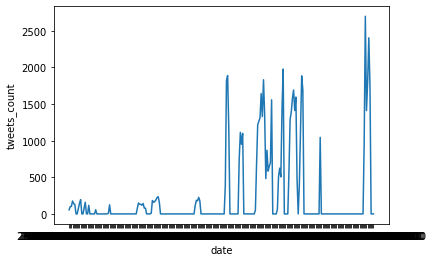

In [44]:
sns.lineplot(data = days_df_sum, x = days_df_sum['date'], y = days_df_sum['tweets_count'])

In [45]:
days_df_sum.describe()

,changes,tweets_count,polarity
count,264.000000,264.000000,264.000000
mean,-0.002844,234.136364,61.266522
std,0.042796,517.303417,138.750272
min,-0.187972,0.000000,0.000000
25%,-0.026199,0.000000,0.000000
50%,-0.002263,0.000000,0.000000
75%,0.021418,128.750000,27.417693
max,0.138376,2699.000000,664.195264


The problem here could be the number of samples. We try removing the days in which the number of tweets is small (< 500). 

In [46]:
days_df_sum_reduced = days_df_sum[days_df_sum['tweets_count'] >= 500]
days_df_sum_reduced.describe()

,changes,tweets_count,polarity
count,42.000000,42.000000,42.000000
mean,-0.008177,1313.571429,349.410715
std,0.038358,514.651677,142.584887
min,-0.077674,505.000000,111.215771
25%,-0.036788,955.250000,234.930053
50%,-0.010936,1321.000000,362.296756
75%,0.020552,1678.250000,437.084526
max,0.111232,2699.000000,664.195264


In [47]:
days_df_sum_reduced.corr()

,changes,tweets_count,polarity
changes,1.000000,0.103809,0.104596
tweets_count,0.103809,1.000000,0.945959
polarity,0.104596,0.945959,1.000000


In [48]:
days_df_avg_reduced = days_df_avg[days_df_avg['tweets_count'] >= 500]
days_df_avg_reduced.describe()

,changes,tweets_count,polarity
count,42.000000,42.000000,42.000000
mean,-0.008177,1313.571429,0.266272
std,0.038358,514.651677,0.032800
min,-0.077674,505.000000,0.192131
25%,-0.036788,955.250000,0.244975
50%,-0.010936,1321.000000,0.265638
75%,0.020552,1678.250000,0.292328
max,0.111232,2699.000000,0.330406


In [49]:
days_df_avg_reduced.corr()

,changes,tweets_count,polarity
changes,1.000000,0.103809,0.082623
tweets_count,0.103809,1.000000,-0.021678
polarity,0.082623,-0.021678,1.000000


Our theory seems more plausible this time. **polarity** and **changes** had a decent high correlation in both cases, meaning that the sum and average of polarities had a meaningful correlation with the price change. Now we start building the actual model.

## 4. Model Selection

Because the data is obviously nonlinear, we will try Decision Tree and SVM for our model.

In [50]:
start_date = pd.to_datetime(df.iloc[0]['date'])
day_count = pd.to_datetime(df.iloc[-1]['date']) - pd.to_datetime(df.iloc[0]['date'])
day_count = int(day_count.total_seconds() / (60 * 60 * 24))
days = []
for date in (start_date + dt.timedelta(n) for n in range(day_count)):
    days.append(str(date))

In [51]:
days_df = pd.DataFrame(days, columns = ["date"])

In [52]:
days_df

,date
0,2021-02-05 00:00:00
1,2021-02-06 00:00:00
2,2021-02-07 00:00:00
3,2021-02-08 00:00:00
4,2021-02-09 00:00:00
...,...
259,2021-10-22 00:00:00
260,2021-10-23 00:00:00
261,2021-10-24 00:00:00
262,2021-10-25 00:00:00


In [53]:
changes2 = []
for i in range(len(days_df)):
    date = days_df.iloc[i]['date'][:10]
    change = bc.loc[date]['changes']
    changes2.append(change)
days_df['changes'] = changes2

In [54]:
counts = []
for i in range(len(days_df)):
    date = days_df.iloc[i]['date'][:10]
    count = len(df_test_nonzero[df_test_nonzero['date'] == date])
    counts.append(count)
days_df['tweets_count'] = counts

In [55]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Cain75,NaN,"Bitcoin, BTC, Crypto, Stockmarket, USD, Money",2021-01-03 07:43:35,4.0,6.0,35.0,False,2021-02-05,#Bitcoin #BTC #MMCrypto\n\n🚨URGENT EMERGENCY🚨 ...,"['Bitcoin', 'BTC', 'MMCrypto']",Twitter Web App,False
1,Crypto Trader,NaN,Bot to stream crypto (mostly BTC) info and fla...,2017-09-09 04:26:15,1094.0,161.0,59.0,False,2021-02-05,"$BTC #BTC #Bitcoin: $37,508.17\n #tradealert \...","['BTC', 'Bitcoin', 'tradealert', 'fibonacci', ...",CryptoTradeBot2,False
2,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097.0,6853.0,False,2021-02-05,#Bitcoin #BTC $MARA $RIOT #inflation $GBTC #Cr...,"['Bitcoin', 'BTC', 'inflation', 'Crypto']",Twitter for Android,False
3,Macstones,"Ilorin, Nigeria",Music Promoter | Blogger | Chelsea | My likes ...,2016-11-15 01:45:48,16936.0,15851.0,6769.0,False,2021-02-05,“you look like all these btc boys”. \nWhat doe...,"['BTC', 'Bitcoin']",Twitter for iPhone,False
4,😘CelebrityBoyFriend😘,Nigeria,🇨🇦\n\nPublic Figure👨‍💼||\n\n\nYeshua is King ✝...,2012-06-20 11:40:45,2177.0,1963.0,77236.0,False,2021-02-05,Don't be fooled guys #socialmedia is next.. th...,"['socialmedia', 'EndSARS', 'Bitcoin', 'BTC', '...",Twitter for Android,False


In [56]:
df = df[::10]
polarities = []
subjectivities = []
tweet_counts = []
changes = []
for i in range(len(df)):
    date = df.iloc[i]['date']
    text = df.iloc[i]['text']
    polarities.append(TextBlob(text).sentiment.polarity)
    subjectivities.append(TextBlob(text).sentiment.subjectivity)
    tweet_counts.append(len(df[df['date'] == date]))
    changes.append(bc.loc[date]['changes'])
df['polarity'], df['subjectivity'], df['tweet_count'], df['change'] = polarities, subjectivities, tweet_counts, changes

/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/3223596301.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'], df['subjectivity'], df['tweet_count'], df['change'] = polarities, subjectivities, tweet_counts, changes
/var/folders/20/62js073s4fl9yzb2vk00gv740000gn/T/ipykernel_29653/3223596301.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'], df['subjectivity'], df['tweet_count'], df['change'] = polarities, subjectivities, tweet_counts, changes
/var/folders/2

In [61]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,polarity,subjectivity,tweet_count,change
0,Cain75,NaN,"Bitcoin, BTC, Crypto, Stockmarket, USD, Money",2021-01-03 07:43:35,4.0,6.0,35.0,False,2021-02-05,#Bitcoin #BTC #MMCrypto\n\n🚨URGENT EMERGENCY🚨 ...,"['Bitcoin', 'BTC', 'MMCrypto']",Twitter Web App,False,-0.600000,0.900000,170,-0.032838
10,Rekt Capital,NaN,Cryptocurrency Trader & Analyst\n\nAuthor of t...,2017-10-11 14:34:38,53613.0,218.0,28870.0,False,2021-02-05,I'm thrilled to share with you that the Rekt C...,NaN,Twitter Web App,False,0.550000,0.600000,170,-0.032838
20,Vision,NaN,Multi-chain wallet and portfolio tracker that ...,2020-02-08 15:49:23,5544.0,93.0,2059.0,False,2021-02-05,We need your help again! 💪\n\nChoose between t...,NaN,Twitter Web App,False,0.000000,0.000000,170,-0.032838
30,Bitcoin Waifu,NaN,NaN,2014-05-24 12:36:05,54273.0,20071.0,577.0,False,2021-02-05,When you fully accept the inevitability of Bit...,"['Bitcoin', 'BTC', 'Crypto']",Crowdfire App,False,0.000000,0.000000,170,-0.032838
40,WILLIAMS CAJETHAN,"Awka, Nigeria","An entrepreneur, a lawyer someday, lover of pu...",2018-08-28 07:23:13,171.0,817.0,1729.0,False,2021-02-05,Imagine the social media bill has been execute...,['bitcoin'],Twitter for Android,False,0.033333,0.066667,170,-0.032838


In [64]:
df.to_csv("~/Desktop/final_df.csv")

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets
from sklearn import metrics

In [59]:
X = df[['user_followers', 'user_friends', 'user_favourites', 'polarity', 'tweet_count']]
Y = df['change']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [72]:
model=tree.DecisionTreeRegressor(max_depth=5)

model.fit(X_train,Y_train)

dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test) 
print("Train R Squared: ", metrics.r2_score(Y_train, dtree_pred_train))
print("Test R Squared: ", metrics.r2_score(Y_test, dtree_pred_test))

Train R Squared:  0.6947136842811001
Test R Squared:  0.6966229651176492


Our Decision Tree model shows a decent performance of r-squared = ~0.7 on both the test and training sets. Let us try the same for trees of different depth.

In [73]:
train_scores = []
test_scores = []
for i in range(1,21):
    model=tree.DecisionTreeRegressor(max_depth=i)

    model.fit(X_train,Y_train)

    dtree_pred_train = model.predict(X_train)
    dtree_pred_test = model.predict(X_test)
    
    train_scores.append(metrics.r2_score(Y_train, dtree_pred_train))
    test_scores.append(metrics.r2_score(Y_test, dtree_pred_test))

<AxesSubplot:ylabel='0'>

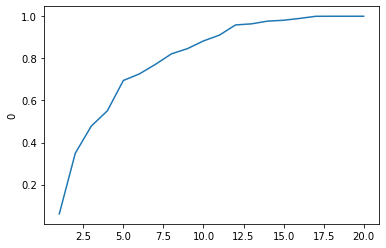

In [82]:
train_df = pd.DataFrame(train_scores, [i for i in range(1, 21)])
sns.lineplot(x = [i for i in range(1, 21)], y = train_df[0])

<AxesSubplot:ylabel='0'>

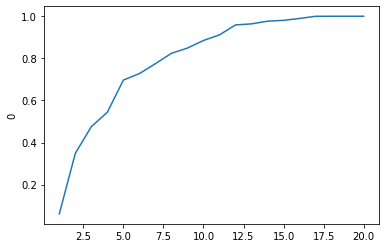

In [ ]:
test_df = pd.DataFrame(test_scores, [i for i in range(1, 21)])
sns.lineplot(x = [i for i in range(1, 21)], y = test_df[0])

For both the training and test data, the performance is enhanced if the tree is deeper, althought this may be an error from multiple datapoints (tweets) corresponding to the same date.

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
model=KNeighborsRegressor()

model.fit(X_train,Y_train)

knn_pred_train = model.predict(X_train)
knn_pred_test = model.predict(X_test)

print("Train R Squared: ", metrics.r2_score(Y_train, knn_pred_train))
print("Test R Squared: ", metrics.r2_score(Y_test, knn_pred_test))

Train R Squared:  0.6435894855512823
Test R Squared:  0.4289906969492263


KNN shows a similar performance on the train set, but a much worse output on the testing set. On the same notion, let us try the same analysis for models of different k-values.

In [93]:
knn_train_scores = []
knn_test_scores = []
for i in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    model=KNeighborsRegressor(n_neighbors = i)

    model.fit(X_train,Y_train)

    knn_pred_train = model.predict(X_train)
    knn_pred_test = model.predict(X_test)
    
    knn_train_scores.append(metrics.r2_score(Y_train, knn_pred_train))
    knn_test_scores.append(metrics.r2_score(Y_test, knn_pred_test))

<AxesSubplot:ylabel='0'>

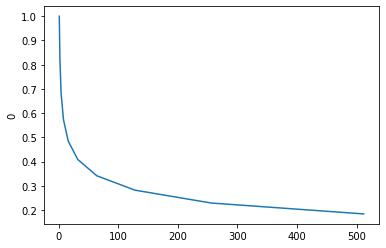

In [94]:
train_df = pd.DataFrame(knn_train_scores, [1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
sns.lineplot(x = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512], y = train_df[0])

<AxesSubplot:ylabel='0'>

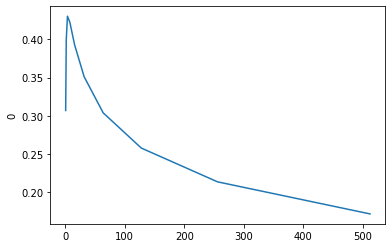

In [95]:
test_df = pd.DataFrame(knn_test_scores, [1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
sns.lineplot(x = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512], y = test_df[0])

In [96]:
test_df

,0
1,0.306913
2,0.399451
4,0.430169
8,0.422382
16,0.392777
32,0.351114
64,0.303827
128,0.257792
256,0.213619
512,0.171686


As expected, small k-values will result in overfitting and will not perform well on the test set. k range from 4~8 seems to be showing the best performance.

## 5. Conclusion

There were several meaningful outcomes from this project. First is that obviously, Bitcoin price is very hard to predict. Some argue that crypto prices reflect the human psychology of the investors, but it seems like sentiment alone is not a very accurate predictor of Bitcoin prices, although with better models the problem may be partially solved. 

What was also interesting was that regardless of whether Bitcoin prices were falling or rising, the investors were posting positive tweets at all times: there were very few tweets that were to the negative extreme of the polarity metric, and on all of the 264 days in the dataset the sum of polarities were positive. At least on Twitter, crypto investors seems to give positve vibes only.

For the model part, I believe that we also could definitely have chosen a better model if we had prior knowledge about crypto prediction. But the hardest part was the feature engineering part, because the tweet texts were hard to quantify and often very irregular in terms of amounts and quality. The dataset I got from Kaggle was also very messy so I had to do a lot of data preprocessing on my own.